In [17]:
import pandas as pd
from google.colab import drive

In [21]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Load dataset
data_amazon_phone = pd.read_csv('/content/drive/My Drive/amazon-cell-phone-reviews.csv')

In [23]:
data_amazon_phone.head()

,asin,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


# Data Preprocessing

In [6]:
# Remove unnecessary columns and handle missing values if any
data_amazon_phone = data_amazon_phone[['rating', 'title', 'body']].dropna()

# Combine title and body for analysis
data_amazon_phone['text'] = data_amazon_phone['title'] + " " + data_amazon_phone['body']

In [ ]:
data_amazon_phone.head()

,rating,title,body,text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ..."
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T..."


In [7]:
# Label encoding for sentiment (positive, neutral, negative)
def sentiment_label(rating):
    if rating > 3:
        return 'positive'
    else:
        return 'negative'

data_amazon_phone['sentiment'] = data_amazon_phone['rating'].apply(sentiment_label)

In [ ]:
data_amazon_phone.head()

,rating,title,body,text,sentiment
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",negative
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,negative
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",positive
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",negative
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",positive


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data_amazon_phone['clean_text'] = data_amazon_phone['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


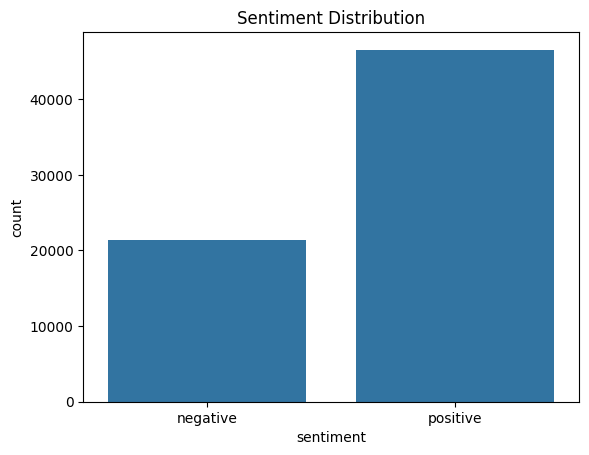

In [ ]:
import seaborn as sns_amazon
import matplotlib.pyplot as plt_amazon
# Plot the distribution of sentiments
sns_amazon.countplot(x='sentiment', data=data_amazon_phone)
plt_amazon.title('Sentiment Distribution')
plt_amazon.show()

In [13]:
from nltk.stem import PorterStemmer
import re

# Initialize stemmer
stemmer = PorterStemmer()

# Extended text preprocessing function
def preprocess_text_extended(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and short words, apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(words)

# Apply extended preprocessing
data_amazon_phone['clean_text'] = data_amazon_phone['text'].apply(preprocess_text_extended)

In [ ]:
data_amazon_phone.head()

,rating,title,body,text,sentiment,clean_text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",negative,def best worst samsung a600 awhil absolut doo ...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,negative,text messag doesnt work due softwar issu nokia...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",positive,love phone great reliabl phone also purchas ph...
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",negative,love phone love phone realli need one didnt ex...
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",positive,great phone servic option lousi case phone gre...


In [14]:
# Filter the dataset by class label
positive_reviews = data_amazon_phone[data_amazon_phone['sentiment'] == 'positive'].sample(n=5000, random_state=42)
negative_reviews = data_amazon_phone[data_amazon_phone['sentiment'] == 'negative'].sample(n=5000, random_state=42)

# Combine the sampled data into a new balanced dataset
balanced_data = pd.concat([positive_reviews, negative_reviews])

# Shuffle the dataset to mix positive and negative reviews
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced dataset
print(balanced_data['sentiment'].value_counts())
balanced_data.head()

sentiment
negative    5000
positive    5000
Name: count, dtype: int64


,rating,title,body,text,sentiment,clean_text
0,2,Have,Have have,Have Have have,negative,
1,4,Four Stars,great durable flip phone.,Four Stars great durable flip phone.,positive,four star great durabl flip phone
2,5,Fon,Buen teléfono sirve para cualquier compañía yo...,Fon Buen teléfono sirve para cualquier compañí...,positive,fon buen teléfono sirv para cualquier compañía...
3,4,ok,works fine just be ready to have it charge for...,ok works fine just be ready to have it charge ...,positive,work fine readi charg hour get 100 forgot long...
4,5,Best Budget Phone,I purchased the phone in white which together ...,Best Budget Phone I purchased the phone in whi...,positive,best budget phone purchas phone white togeth b...


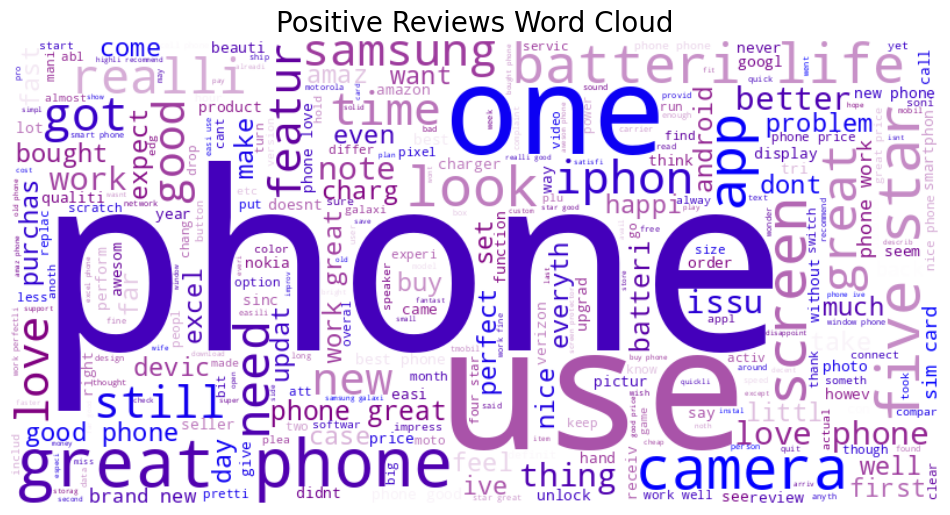

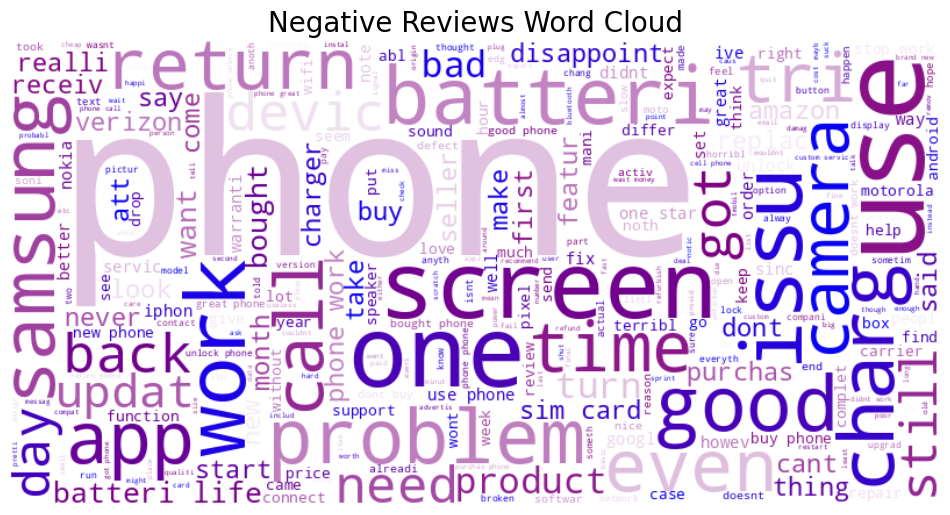

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for positive and negative reviews separately
positive_text = " ".join(balanced_data[balanced_data['sentiment'] == 'positive']['clean_text'])
negative_text = " ".join(balanced_data[balanced_data['sentiment'] == 'negative']['clean_text'])

# Define a custom colormap and gradient background
custom_colors = {
    "blue_to_purple": [(0, "blue"), (0.5, "purple"), (1, "white")],
}
def custom_colormap(color_map):
    from matplotlib.colors import LinearSegmentedColormap
    return LinearSegmentedColormap.from_list("", custom_colors[color_map])

# Define a function for unique word cloud settings
def generate_wordcloud(text, title, colormap="blue_to_purple"):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap=custom_colormap(colormap),
        max_words=300,
        contour_width=3,
        contour_color="gold",
        prefer_horizontal=0.7,
        relative_scaling=0.6
    ).generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Generate and display word clouds
generate_wordcloud(positive_text, "Positive Reviews Word Cloud", colormap="blue_to_purple")
generate_wordcloud(negative_text, "Negative Reviews Word Cloud", colormap="blue_to_purple")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset

# Transform the clean_text column
X = tfidf.fit_transform(balanced_data['clean_text']).toarray()

# Target variable
y = balanced_data['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model results
results = {}

# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Calculate metrics for SVM
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, svm_predictions),
    'Precision': precision_score(y_test, svm_predictions, average='weighted'),
    'Recall': recall_score(y_test, svm_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, svm_predictions, average='weighted')
}

print(results['SVM'])

{'Accuracy': 0.8915, 'Precision': 0.8917799903186059, 'Recall': 0.8915, 'F1 Score': 0.8915006781251695}


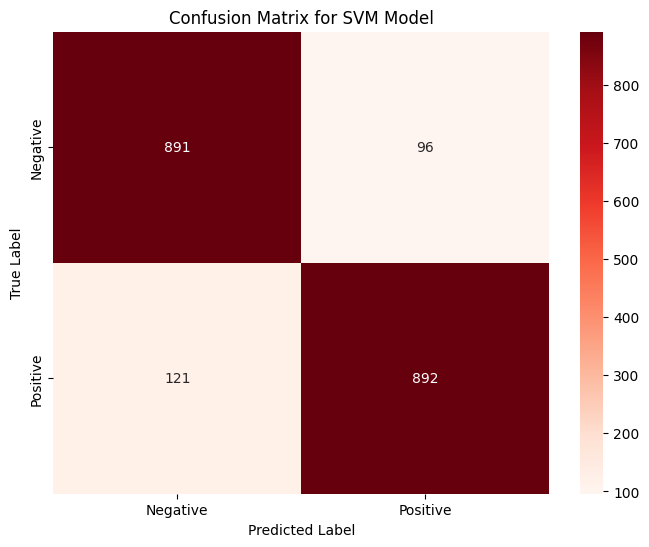

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrix
plt_amazon.figure(figsize=(8, 6))
sns_amazon.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt_amazon.xlabel('Predicted Label')
plt_amazon.ylabel('True Label')
plt_amazon.title('Confusion Matrix for SVM Model')
plt_amazon.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics for Random Forest
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_predictions),
    'Precision': precision_score(y_test, rf_predictions, average='weighted'),
    'Recall': recall_score(y_test, rf_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, rf_predictions, average='weighted')
}

print(results['Random Forest'])

{'Accuracy': 0.864, 'Precision': 0.865242809955608, 'Recall': 0.864, 'F1 Score': 0.8639428671451076}


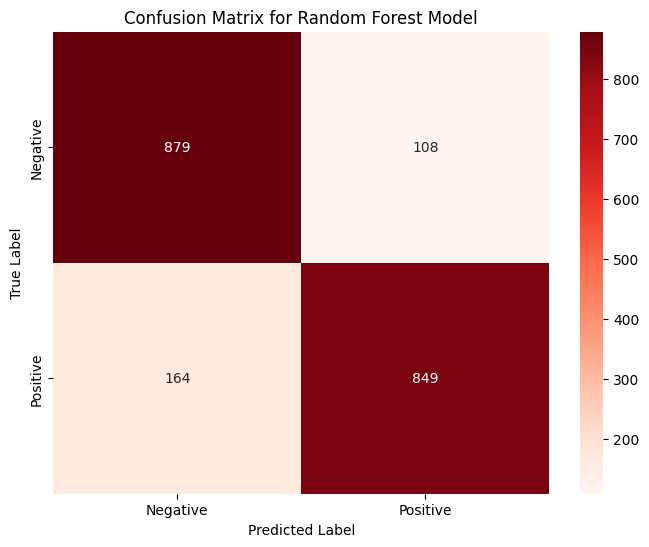

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt_amazon.figure(figsize=(8, 6))
sns_amazon.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt_amazon.xlabel('Predicted Label')
plt_amazon.ylabel('True Label')
plt_amazon.title('Confusion Matrix for Random Forest Model')
plt_amazon.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



# Split data for RNN
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(balanced_data['clean_text'], y_encoded, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_rnn)

X_train_rnn = tokenizer.texts_to_sequences(X_train_rnn)
X_test_rnn = tokenizer.texts_to_sequences(X_test_rnn)

max_length = 100  # Define maximum sequence length
X_train_rnn = pad_sequences(X_train_rnn, maxlen=max_length, padding='post')
X_test_rnn = pad_sequences(X_test_rnn, maxlen=max_length, padding='post')

# Build the RNN Model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' if binary, adjust if multiclass
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN Model
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32, validation_split=0.2)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.5121 - loss: 0.6946 - val_accuracy: 0.4656 - val_loss: 0.6960
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5278 - loss: 0.6933 - val_accuracy: 0.6687 - val_loss: 0.6455
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.7042 - loss: 0.5954 - val_accuracy: 0.7756 - val_loss: 0.5072
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8233 - loss: 0.4443 - val_accuracy: 0.7900 - val_loss: 0.4866
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8523 - loss: 0.3966 - val_accuracy: 0.7931 - val_loss: 0.5059
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8701 - loss: 0.3474 - val_accuracy: 0.7781 - val_loss: 0.5201
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8944 - loss: 0.3007 - val_accuracy: 0.7775 - val_loss: 0.5249
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8965 - loss: 0.2851 - val_ac

In [ ]:
# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test_rnn)
print(f"\nRNN Model Accuracy: {rnn_accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7556 - loss: 0.5627

RNN Model Accuracy: 0.78
